# Support Vector Machines

In [1]:
# We import the needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# We initialize the parameters

means1 = [0, 0]
sd1 = [[1, -0.75], [-0.75, 1]]
means2 = [4, 8]
sd2 = [[1, 0], [0, 1]]

K = 100
m = 2 * K

In [3]:
# Random multivariate normal varibles

x1 = np.random.multivariate_normal(means1, sd1, size = K)
x2 = np.random.multivariate_normal(means2, sd2, size = K)

X = np.concatenate((x1, x2)).T
y = np.concatenate(([-1]*K, [1]*K))

### Classical stochastic gradient descent

In [4]:
# We define the Stochastic Support Vector Machine Algorithm

def Stoch_SupportVectorMachine(x, y, itera = 200, mu0 = 100, alpha = 0.01):
    
    # We initilaize the parameters
    n = x.shape[0]
    m = len(y)
    b = 0
    zer = np.zeros(n)
    n_iter = 0
    check = []
    acum_fun = []
    mu = mu0 
     
    for i in range(1, itera + 1):
        
        order = np.arange(0, m)
        np.random.shuffle(order)
        zer_old = zer
        b_old = b
        mu = mu + i
        trans = 1 / mu
        
        # For every batch
        for batch in order:
            
            auxiliar = (y[batch] * (zer.T.dot(x[:, batch:(batch+1)]) + b)) < 1
            zer = zer - trans * (alpha * zer - auxiliar * y[batch] * X[:, batch:(batch+1)])
            b = b - trans * (auxiliar * - y[batch])
        
        Res = alpha/2 * zer.T.dot(zer) + np.sum(np.maximum(np.zeros(y.shape), 1 - y*(zer.T.dot(x) + b)))
        acum_fun.append(Res[0,0])
        check = (np.linalg.norm(zer_old - zer))   
        
        # Precision Treshold
        if (check < 0.000001): 
            n_iter = i
            break
            
    n_iter = i
    
    return {'w': zer[:, 0], 'b': b[0], "iter": itera, "acum": acum_fun}

Number of Iterations: 200


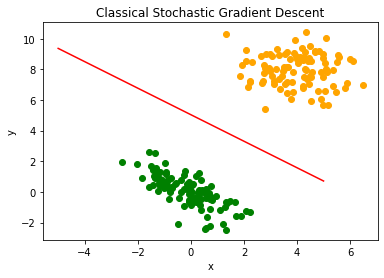

In [5]:
# Plot

z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = 10, alpha =0.01)

# Linspace
linx = np.linspace(-5, 5)
zer = z['w']
b = z['b']
liny = -zer[0] / zer[1] * linx - (b) / zer[1]

# Plot
plt.plot(X.T[:K, 0], X.T[:K, 1], 'o', color = 'green')
plt.plot(X.T[K:, 0], X.T[K:, 1], 'o', color = 'orange')
plt.plot(linx, liny, color = 'red')
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Classical Stochastic Gradient Descent")
print("Number of Iterations:", z["iter"])

Number of iterations = 200 with Alpha = 0.1 mu0 = 10
Value of f(w, b): 0.6004527904431352 

Number of iterations = 200 with Alpha = 0.001 mu0 = 10
Value of f(w, b): 0.0002110028209539966 

Number of iterations = 200 with Alpha = 0.1 mu0 = 100
Value of f(w, b): 0.5329740833546253 

Number of iterations = 200 with Alpha = 0.001 mu0 = 100
Value of f(w, b): 9.472007142301164e-05 

Number of iterations = 200 with Alpha = 0.1 mu0 = 1000
Value of f(w, b): 0.6095806761086485 

Number of iterations = 200 with Alpha = 0.001 mu0 = 1000
Value of f(w, b): 0.22709968028342944 



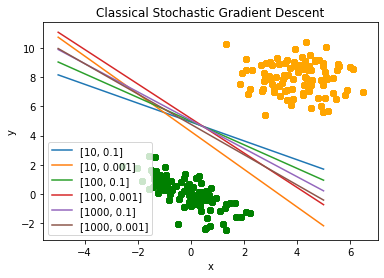

In [6]:
# Let's try with different values for mu and alpha

mu0s = [10, 100, 1000]
alphas = [0.1, 0.001]

# Loop for comparing each mu and alpha

for i in range(len(mu0s)):
    
    for j in range(len(alphas)):
        
        z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = mu0s[i], alpha = alphas[j])
        
        # Print
        print("Number of iterations =", z["iter"], "with Alpha =", alphas[j], "mu0 =" , mu0s[i])
        print("Value of f(w, b):", z["acum"][-1], "\n")
        
        # Linspaces
        linx = np.linspace(-5, 5)
        zer = z['w']
        b = z['b']
        liny = -zer[0] / zer[1] * linx - (b) / zer[1]
        
        # Plot
        plt.plot(X.T[:K, 0], X.T[:K, 1], 'o', color = 'green')
        plt.plot(X.T[K:, 0], X.T[K:, 1], 'o', color = 'orange')
        plt.plot(linx, liny, label = [mu0s[i], alphas[j]])
        plt.xlabel('x') 
        plt.ylabel('y') 
        plt.title("Classical Stochastic Gradient Descent")

plt.legend(loc="best")

Text(0, 0.5, 'Logarithm')

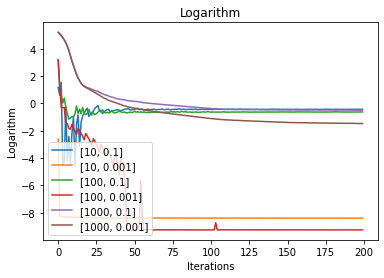

In [7]:
# Different mu's and alphas
mu0s = [10, 100, 1000]
alphas = [0.1, 0.001]

# We calculate the logarithms
for i in range(len(mu0s)):
    
    for j in range(len(alphas)):
        
        z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = mu0s[i], alpha = alphas[j])
        plt.plot(np.log(z["acum"]), label = [mu0s[i], alphas[j]]) 
        
# Plot
plt.legend(loc="best")
plt.title("Logarithm")
plt.xlabel('Iterations') 
plt.ylabel('Logarithm') 

### Perform some experiments with mini-batch

In [8]:
# We define the mini_batch_SVM

def mini_batch_SVM(x, y, itera = 200, batch_size = 1, mu0 = 100, alpha = 0.01):
    
    # We initialize the parameters
    n = x.shape[0]
    m = len(y)
    b = 0
    zer = np.zeros(n)
    n_iter = 0
    check = []
    acum_fun = []
    mu = mu0
    
    for i in range(1, itera + 1):
        order = np.arange(0, m)
        np.random.shuffle(order)
        order = [order[s:s+batch_size] for s in range(0,len(order),batch_size)]
        zer_old = zer
        b_old = b
        
        # For every batch
        for batch in order: 
            
            mu = mu + i
            trans = 1 / mu
            auxiliar1 = 0
            auxiliar2 = 0
            
            for j in batch:
                
                auxiliar = (y[j] * (zer.T.dot(x[:, j:(j+1)]) + b)) < 1
                auxiliar1 +=  auxiliar * -y[j] * X[:, j:(j+1)]
                auxiliar2 += auxiliar * - y[j]
            zer = zer - trans * (alpha * zer + auxiliar1)
            b = b - trans * (auxiliar2)
            
        Res = alpha/2 * zer.T.dot(zer) + np.sum(np.maximum(np.zeros(y.shape), 1 - y*(zer.T.dot(x) + b)))
        acum_fun.append(Res[0,0])
        check = (np.linalg.norm(zer_old - zer))   
        
        # Precision threshold
        if (check < 0.000001): 
            n_iter = i
            break
            
    n_iter = i
    
    return {'w': zer[:, 0], 'b': b[0], "iter": n_iter, "acum": acum_fun}
        

Number of iterations: 200


Text(0, 0.5, 'y')

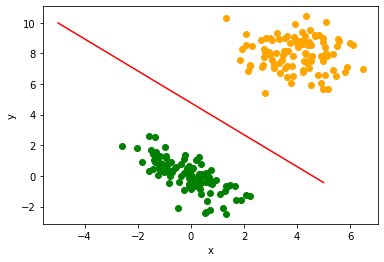

In [9]:
# Mini batch
z = mini_batch_SVM(x = X, y = y, itera = 200, batch_size = 50, mu0 = 1000, alpha = 0.01)
print("Number of iterations:", z["iter"])

# Linspace
linx = np.linspace(-5, 5)
zer = z['w']
b = z['b']
yy = -zer[0] / zer[1] * linx - (b) / zer[1]

# Plot
plt.plot(X.T[:K, 0], X.T[:K, 1], 'o', color = 'green')
plt.plot(X.T[K:, 0], X.T[K:, 1], 'o', color = 'orange')
plt.plot(linx, liny, color = 'red')
plt.xlabel('x') 
plt.ylabel('y') 

### Perform plot of the logarithm

Text(0, 0.5, 'Logarithm')

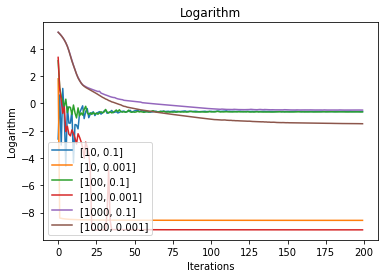

In [10]:
# Different mu's and alphas
mu0s = [10, 100, 1000]
alphas = [0.1, 0.001]

# We create the logarithm plot
for i in range(len(mu0s)):
    
    for j in range(len(alphas)):
        
        z = Stoch_SupportVectorMachine(x = X, y = y, itera = 200, mu0 = mu0s[i], alpha = alphas[j])
        
        # Plot of the logarithm of the results
        plt.plot(np.log(z["acum"]), label = [mu0s[i], alphas[j]]) 

# Plot
plt.legend(loc="best")
plt.title("Logarithm")
plt.xlabel('Iterations') 
plt.ylabel('Logarithm') 